In [ ]:
pip install adjustText

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install soccerdata

In [108]:
import soccerdata as sd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import unidecode
import seaborn as sns
from sklearn.linear_model import LinearRegression
from fuzzywuzzy import process
from adjustText import adjust_text

In [5]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [6]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[10/21/24 19:25:05] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=335265;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=848288;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [7]:
team_season_stats = fbref.read_team_season_stats(stat_type="passing")
team_season_stats.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used 90s  Total               \
                                                        Cmp    Att  Cmp%   
league      season team                                                    
BRA-Serie A 2425   Ath Paranaense             30  28  10342  13075  79.1   
                   Atl Goianiense             40  30   9850  12735  77.3   
                   Atlético Mineiro           35  29  13239  15843  83.6   
                   Bahia                      27  30  14508  17027  85.2   
                   Botafogo (RJ)              37  30  11896  14560  81.7   

                                                    Short              ...  \
                                    TotDist PrgDist   Cmp   Att  Cmp%  ...   
league      season team                                                ...   
BRA-Serie A 2425   Ath Paranaense    193508   69817  4195  4793  87.5  ...   
                   Atl Goianiense    188134   70903  3921  4572  85.8  ...   
                   Atlético Mineiro  235956   78638  5902  6516  90.6  ...   
                   Bahia             246878   84279  6602  7215  91.5  ...   
                   Botafogo (RJ)     221009   81885  4817  5469  88.1  ...   

                                    Ast   xAG Expected         KP   1/3  PPA  \
                                                    xA A-xAG                   
league      season team                                                        
BRA-Serie A 2425   Ath Paranaense    24  28.8     28.4  -4.8  339   951  248   
                   Atl Goianiense    12  22.4     24.8 -10.4  320  1016  221   
                   Atlético Mineiro  21  21.0     26.1   0.0  285  1096  239   
                   Bahia             33  31.7     29.0   1.3  315  1100  262   
                   Botafogo (RJ)     32  30.7     29.1   1.3  334  1062  248   

                                    CrsPA  PrgP  \
                                                  
league      season team                           
BRA-Serie A 2425   Ath Paranaense      77  1192   
                   Atl Goianiense      85  1155   
                   Atlético Mineiro    72  1264   
                   Bahia               72  1336   
                   Botafogo (RJ)       70  1244   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats  

[5 rows x 26 columns]

In [8]:
print(team_season_stats.columns)


MultiIndex([('players_used',        ''),
            (         '90s',        ''),
            (       'Total',     'Cmp'),
            (       'Total',     'Att'),
            (       'Total',    'Cmp%'),
            (       'Total', 'TotDist'),
            (       'Total', 'PrgDist'),
            (       'Short',     'Cmp'),
            (       'Short',     'Att'),
            (       'Short',    'Cmp%'),
            (      'Medium',     'Cmp'),
            (      'Medium',     'Att'),
            (      'Medium',    'Cmp%'),
            (        'Long',     'Cmp'),
            (        'Long',     'Att'),
            (        'Long',    'Cmp%'),
            (         'Ast',        ''),
            (         'xAG',        ''),
            (    'Expected',      'xA'),
            (    'Expected',   'A-xAG'),
            (          'KP',        ''),
            (         '1/3',        ''),
            (         'PPA',        ''),
            (       'CrsPA',        ''),
            (   

In [11]:
sofascore = sd.Sofascore(leagues='BRA-Serie A', seasons='24')
print(sofascore.__doc__)

[10/21/24 19:26:21] INFO     Saving cached data to /root/soccerdata/data/Sofascore                   ]8;id=542372;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=642081;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data available at http://www.sofascore.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/Sofascore``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of Leagues to include.
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - 'tor': Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - 

In [12]:
league_table = sofascore.read_league_table()
league_table.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


team  MP   W  D   L  GF  GA  GD  Pts
league      season                                           
BRA-Serie A 2425     Botafogo  30  18  7   5  48  26  22   61
            2425    Palmeiras  30  18  6   6  51  23  28   60
            2425    Fortaleza  30  16  8   6  39  30   9   56
            2425     Flamengo  29  15  6   8  45  34  11   51
            2425    São Paulo  30  15  5  10  41  32   9   50

In [13]:
def get_market_values(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Verifica se houve erro na requisição
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return pd.DataFrame()  # Retorna DataFrame vazio em caso de erro

    soup = BeautifulSoup(response.content, 'html.parser')

    # Listas para armazenar os dados
    clubes = []
    valores = []

    # Encontrar a tabela com os clubes e valores de mercado
    table = soup.find('table', {'class': 'items'})

    if not table:
        print("Tabela não encontrada.")
        return pd.DataFrame()  # Retorna DataFrame vazio se a tabela não for encontrada

    # Extrair nome do clube e valor de mercado
    rows = table.find_all('tr', {'class': ['odd', 'even']})
    for row in rows:
        try:
            clube = row.find('td', {'class': 'hauptlink'}).text.strip()
            valor = row.find_all('td', {'class': 'rechts'})[1].text.strip()

            # Tratamento do valor de mercado
            valor = valor.lower().replace('€', '').replace('mi', '').replace('.', '').replace(',', '.').strip()
            valor_float = float(valor)  # Escala para milhões

            clubes.append(clube)
            valores.append(valor_float)
        except (AttributeError, IndexError, ValueError) as e:
            print(f"Erro ao processar a linha: {e}")
            continue  # Ignora a linha em caso de erro e continua o scraping

        # Adicionar delay para evitar bloqueios (entre 3 e 6 segundos)
        time.sleep(random.uniform(3, 6))

    # Retornar os dados como DataFrame
    df = pd.DataFrame({'Clube': clubes, 'Valor de Mercado (€)': valores})
    return df

# URL da página da Série A no Transfermarkt
url = 'https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1'

# Executar a função e exibir os dados
df_clubes = get_market_values(url)
print(df_clubes)


                   Clube  Valor de Mercado (€)
0            CR Flamengo                212.10
1           SE Palmeiras                209.85
2            Botafogo FR                136.50
3           São Paulo FC                105.55
4         SC Corinthians                105.20
5       Atlético Mineiro                105.10
6            Grêmio FBPA                 95.30
7          Fluminense FC                 82.05
8            Cruzeiro EC                 80.85
9               EC Bahia                 77.25
10      CR Vasco da Gama                 76.18
11         RB Bragantino                 75.40
12      SC Internacional                 73.60
13  Athletico Paranaense                 56.40
14          Fortaleza EC                 45.15
15             Cuiabá EC                 26.70
16            EC Vitória                 24.18
17   Atlético Goianiense                 23.35
18           Criciúma EC                 21.63
19          EC Juventude                 19.55


In [14]:
# Verificar os Nomes dos Clubes
df_teams = league_table
print("Clubes no Sofascore:")
print(df_teams['team'].unique())

print("\nClubes no Transfermarkt:")
print(df_clubes['Clube'].unique())

Clubes no Sofascore:
['Botafogo' 'Palmeiras' 'Fortaleza' 'Flamengo' 'São Paulo' 'Internacional'
 'Bahia' 'Cruzeiro' 'Atlético Mineiro' 'Vasco' 'Criciúma' 'Grêmio'
 'Red Bull Bragantino' 'Juventude' 'Fluminense' 'Vitória' 'Corinthians'
 'Athletico' 'Cuiabá' 'Atlético Goianiense']

Clubes no Transfermarkt:
['CR Flamengo' 'SE Palmeiras' 'Botafogo FR' 'São Paulo FC'
 'SC Corinthians' 'Atlético Mineiro' 'Grêmio FBPA' 'Fluminense FC'
 'Cruzeiro EC' 'EC Bahia' 'CR Vasco da Gama' 'RB Bragantino'
 'SC Internacional' 'Athletico Paranaense' 'Fortaleza EC' 'Cuiabá EC'
 'EC Vitória' 'Atlético Goianiense' 'Criciúma EC' 'EC Juventude']


In [15]:
# Função para encontrar correspondências aproximadas
def padronizar_nome(nome, lista_nomes):
    nome_padronizado, score = process.extractOne(nome, lista_nomes)
    if score >= 80:  # Considera como match se a similaridade for alta
        return nome_padronizado
    return None

# Aplicar fuzzy matching para padronizar nomes
df_teams['team_mapeado_fuzzy'] = df_teams['team'].apply(
    lambda x: padronizar_nome(x, df_clubes['Clube'].unique())
).fillna(df_teams['team'])

# Verificar se a padronização ocorreu corretamente
print("\nClubes mapeados:")
print(df_teams[['team', 'team_mapeado_fuzzy']].head())

# Tentar unir os DataFrames
df = pd.merge(df_teams, df_clubes, left_on='team_mapeado_fuzzy', right_on='Clube', how='inner')

# Verificar o DataFrame resultante
print("\nPrimeiras linhas do DataFrame após o merge:")
print(df.head())

# Garantir que as colunas necessárias existem antes de calcular a eficiência
if 'Pts' in df.columns and 'Valor de Mercado (€)' in df.columns:
    df['eficiencia'] = df['Pts'] / df['Valor de Mercado (€)']
else:
    print("\nErro: Colunas necessárias para calcular a eficiência não encontradas.")

# Exibir o DataFrame final
print("\nDados Integrados:")
print(df[['team_mapeado_fuzzy', 'Pts', 'Valor de Mercado (€)', 'eficiencia']])

# Ordenar por eficiência em ordem decrescente, se disponível
if 'eficiencia' in df.columns:
    df = df.sort_values(by='eficiencia', ascending=False)
    print("\nDados Ordenados por Eficiência:")
    print(df[['team_mapeado_fuzzy', 'Pts', 'Valor de Mercado (€)', 'eficiencia']])
else:
    print("\nEficiência não pode ser calculada devido a colunas ausentes.")



Clubes mapeados:
                         team team_mapeado_fuzzy
league      season                              
BRA-Serie A 2425     Botafogo        Botafogo FR
            2425    Palmeiras       SE Palmeiras
            2425    Fortaleza       Fortaleza EC
            2425     Flamengo        CR Flamengo
            2425    São Paulo       São Paulo FC

Primeiras linhas do DataFrame após o merge:
        team  MP   W  D   L  GF  GA  GD  Pts team_mapeado_fuzzy         Clube  \
0   Botafogo  30  18  7   5  48  26  22   61        Botafogo FR   Botafogo FR   
1  Palmeiras  30  18  6   6  51  23  28   60       SE Palmeiras  SE Palmeiras   
2  Fortaleza  30  16  8   6  39  30   9   56       Fortaleza EC  Fortaleza EC   
3   Flamengo  29  15  6   8  45  34  11   51        CR Flamengo   CR Flamengo   
4  São Paulo  30  15  5  10  41  32   9   50       São Paulo FC  São Paulo FC   

   Valor de Mercado (€)  
0                136.50  
1                209.85  
2                 45.15  
3  

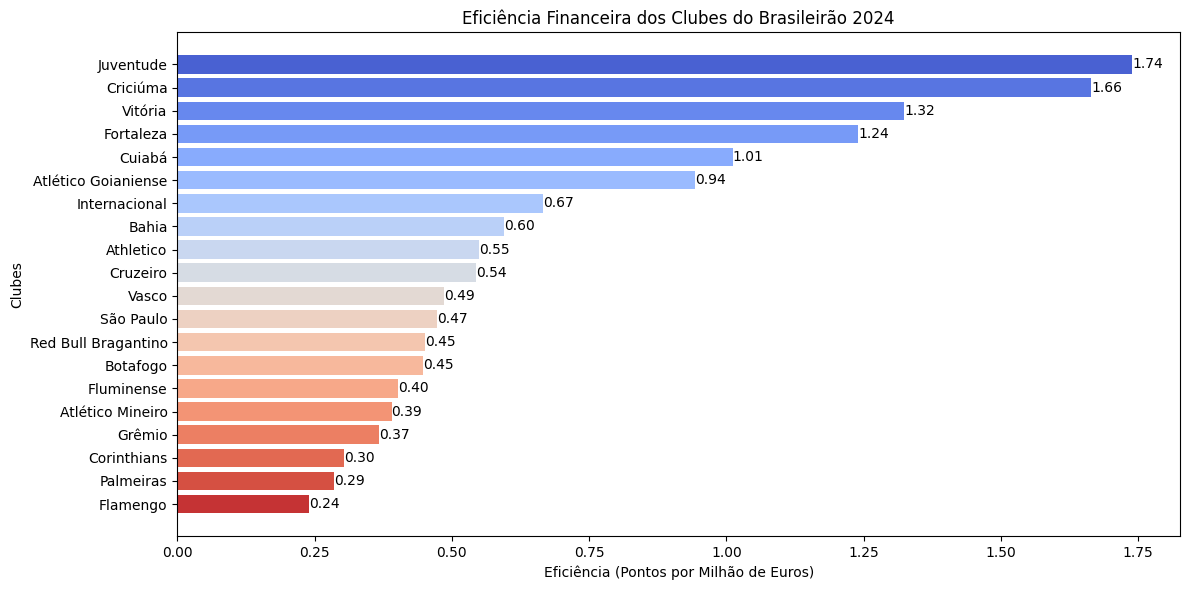

In [16]:
# Criar uma paleta de cores baseada na eficiência
cores = sns.color_palette("coolwarm", len(df))

# Gerar o gráfico com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(df['team'], df['eficiencia'], color=cores)
plt.barh(df['team'], df['eficiencia'], color=cores)
plt.xlabel('Eficiência (Pontos por Milhão de Euros)')
plt.ylabel('Clubes')
plt.title('Eficiência Financeira dos Clubes do Brasileirão 2024')

# Adicionar anotações em cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [17]:
correlacao = df[['Pts', 'Valor de Mercado (€)']].corr()
print("Correlação entre Pontos e Valor de Mercado:")
print(correlacao)


Correlação entre Pontos e Valor de Mercado:
                           Pts  Valor de Mercado (€)
Pts                   1.000000              0.655353
Valor de Mercado (€)  0.655353              1.000000


Correlação positiva (0.637):
Isso sugere que, em geral, clubes com maior valor de mercado tendem a conquistar mais pontos, mas essa relação não é perfeita.

Correlação moderada:
Embora exista uma tendência positiva, outros fatores além do valor de mercado influenciam os pontos conquistados (como a gestão, técnico, planejamento e desempenho dos jogadores em campo).

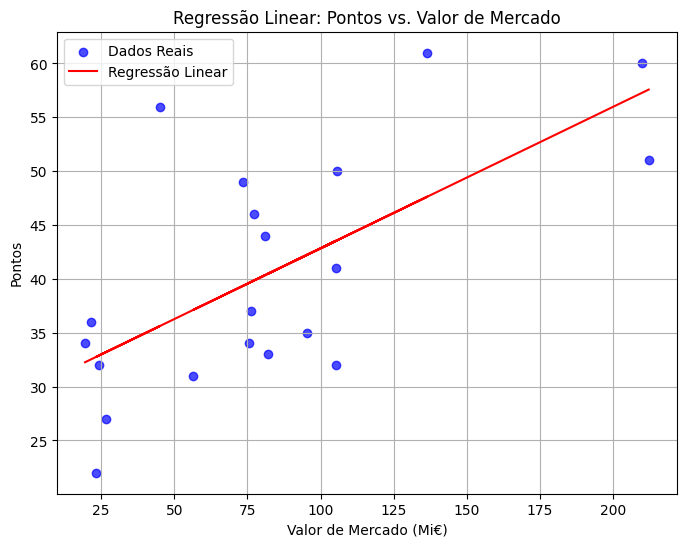

Coeficiente da Regressão: 0.13
Intercepto: 29.69


In [18]:
# Preparar os dados
X = df[['Valor de Mercado (€)']].values
y = df['Pts'].values

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Pontos vs. Valor de Mercado')
plt.xlabel('Valor de Mercado (Mi€)')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente da Regressão: {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")


In [19]:
r2 = modelo.score(X, y)
print(f"R²: {r2:.2f}")

R²: 0.43


O valor de R² = 0.43 indica que o modelo de regressão linear explica 43% da variação nos pontos dos clubes com base no valor de mercado. Isso sugere que o valor de mercado tem alguma influência no desempenho dos clubes, mas 57% da variação nos pontos é explicada por outros fatores.

In [32]:
 #Adicionar Variáveis Explicativas que possam melhorar o modelo

# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={
    'GF': 'gols_marcados',
    'GA': 'gols_sofridos',
    'Pts': 'pontos'
})

# Adicionar nova variável explicativa: saldo de gols
df_teams['saldo_gols'] = df_teams['gols_marcados'] - df_teams['gols_sofridos']

# Exibir uma amostra dos dados com as variáveis explicativas
print("\nAmostra dos Dados:")
print(df_teams.head())



Amostra dos Dados:
                         team  gols_marcados  gols_sofridos  pontos  \
league      season                                                    
BRA-Serie A 2425     Botafogo             48             26      61   
            2425    Palmeiras             51             23      60   
            2425    Fortaleza             39             30      56   
            2425     Flamengo             45             34      51   
            2425    São Paulo             41             32      50   

                    saldo_gols  
league      season              
BRA-Serie A 2425            22  
            2425            28  
            2425             9  
            2425            11  
            2425             9  


In [29]:
#Adicionar Variáveis Explicativas que possam melhorar o modelo
# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={'GF': 'gols_marcados', 'GA': 'gols_sofridos', 'Pts': 'pontos'})

# Exibir uma amostra dos dados
print(df_teams.head())


                         team  gols_marcados  gols_sofridos  pontos
league      season                                                 
BRA-Serie A 2425     Botafogo             48             26      61
            2425    Palmeiras             51             23      60
            2425    Fortaleza             39             30      56
            2425     Flamengo             45             34      51
            2425    São Paulo             41             32      50


In [30]:
# Clubes não combinados do Sofascore
clubes_nao_mapeados_sofascore = df_teams[~df_teams['team'].isin(df['team'])]
print("\nClubes do Sofascore não combinados:")
print(clubes_nao_mapeados_sofascore['team'].unique())

# Clubes não combinados do Transfermarkt
clubes_nao_mapeados_transfermarkt = df_clubes[~df_clubes['Clube'].isin(df['Clube'])]
print("\nClubes do Transfermarkt não combinados:")
print(clubes_nao_mapeados_transfermarkt['Clube'].unique())



Clubes do Sofascore não combinados:
[]

Clubes do Transfermarkt não combinados:
[]


In [34]:
# Função para encontrar correspondências aproximadas
def padronizar_nome(nome, lista_nomes):
    nome_padronizado, score = process.extractOne(nome, lista_nomes)
    if score >= 80:  # Considerar correspondências com score >= 80
        return nome_padronizado
    return None

# Aplicar fuzzy matching aos nomes dos clubes do Sofascore
df_teams['team_padronizado'] = df_teams['team'].apply(
    lambda x: padronizar_nome(x, df_clubes['Clube'].unique())
).fillna(df_teams['team'])

# Realizar a união dos DataFrames com nomes padronizados
df = pd.merge(
    df_teams,
    df_clubes,
    left_on='team_padronizado',
    right_on='Clube',
    how='inner'
)

# Verificar o DataFrame após a união
print("\nTimes combinados corretamente:")
print(df[['team_padronizado', 'pontos', 'Valor de Mercado (€)']])

# Definir as variáveis independentes e a variável dependente
X2 = df[['Valor de Mercado (€)', 'gols_marcados', 'gols_sofridos']]
y2 = df['pontos']

# Treinar o modelo de regressão linear
modelo2 = LinearRegression()
modelo2.fit(X2, y2)

# Fazer previsões
df['pontos_previstos'] = modelo2.predict(X2)

# Avaliar o modelo
r2 = modelo2.score(X2, y2)
print(f"\nR²: {r2:.2f}")
# Exibir os coeficientes da regressão
print(f"Coeficientes: {modelo2.coef_}")
print(f"Intercepto: {modelo2.intercept_}")
# Exibir os times com pontos reais e previstos
print("\nTimes Avaliados e Pontos Previstos:")
print(df[['team_padronizado', 'pontos', 'pontos_previstos']])


Times combinados corretamente:
        team_padronizado  pontos  Valor de Mercado (€)
0            Botafogo FR      61                136.50
1           SE Palmeiras      60                209.85
2           Fortaleza EC      56                 45.15
3            CR Flamengo      51                212.10
4           São Paulo FC      50                105.55
5       SC Internacional      49                 73.60
6               EC Bahia      46                 77.25
7            Cruzeiro EC      44                 80.85
8       Atlético Mineiro      41                105.10
9       CR Vasco da Gama      37                 76.18
10           Criciúma EC      36                 21.63
11           Grêmio FBPA      35                 95.30
12         RB Bragantino      34                 75.40
13          EC Juventude      34                 19.55
14         Fluminense FC      33                 82.05
15            EC Vitória      32                 24.18
16        SC Corinthians      32 

## Coeficientes:
### Valor de Mercado (€):
Coeficiente: -0.0257
O coeficiente negativo sugere que, em média, o aumento no valor de mercado tem um impacto pequeno e negativo nos pontos. Pode indicar que valor de mercado sozinho não garante sucesso em campo.

### Gols Marcados:
Coeficiente: 1.0492
Cada gol marcado adiciona aproximadamente 1 ponto. Isso confirma a importância de um ataque eficiente para o desempenho.

### Gols Sofridos:
Coeficiente: -0.7772
Cada gol sofrido reduz os pontos em cerca de 0.78. Esse coeficiente reforça a importância de uma defesa sólida.

### Intercepto: 32.91

Este valor representa o número de pontos previstos para um time com todas as variáveis independentes iguais a zero (ou seja, no ponto de origem do modelo). Embora não tenha um significado prático direto, ele é necessário para ajustar a linha de regressão.

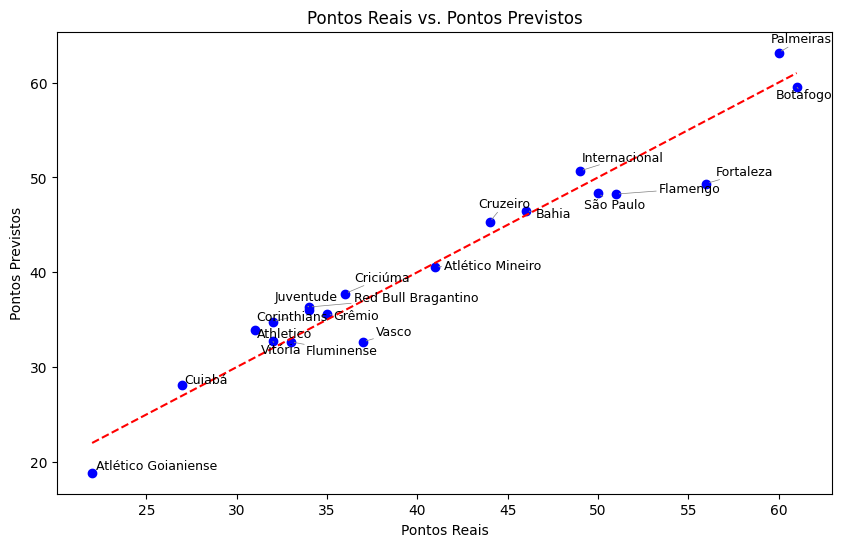

In [35]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pontos'], df['pontos_previstos'], color='blue')

# Adicionar uma linha de referência para comparação 1:1
plt.plot(
    [df['pontos'].min(), df['pontos'].max()],
    [df['pontos'].min(), df['pontos'].max()],
    'r--'
)

# Adicionar os nomes dos times usando adjust_text para evitar sobreposição
texts = []
for i in range(df.shape[0]):
    texts.append(
        plt.text(
            df['pontos'].iloc[i],
            df['pontos_previstos'].iloc[i],
            df['team'].iloc[i],
            fontsize=9
        )
    )

# Ajustar os textos para evitar sobreposição
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configurar rótulos e título
plt.xlabel('Pontos Reais')
plt.ylabel('Pontos Previstos')
plt.title('Pontos Reais vs. Pontos Previstos')

# Exibir o gráfico
plt.show()

In [38]:
# Calcular custo por gol e custo por ponto
df['Custo por Gol (€)'] = df['Valor de Mercado (€)'] / df['gols_marcados']
df['Custo por Ponto (€)'] = df['Valor de Mercado (€)'] / df['pontos']

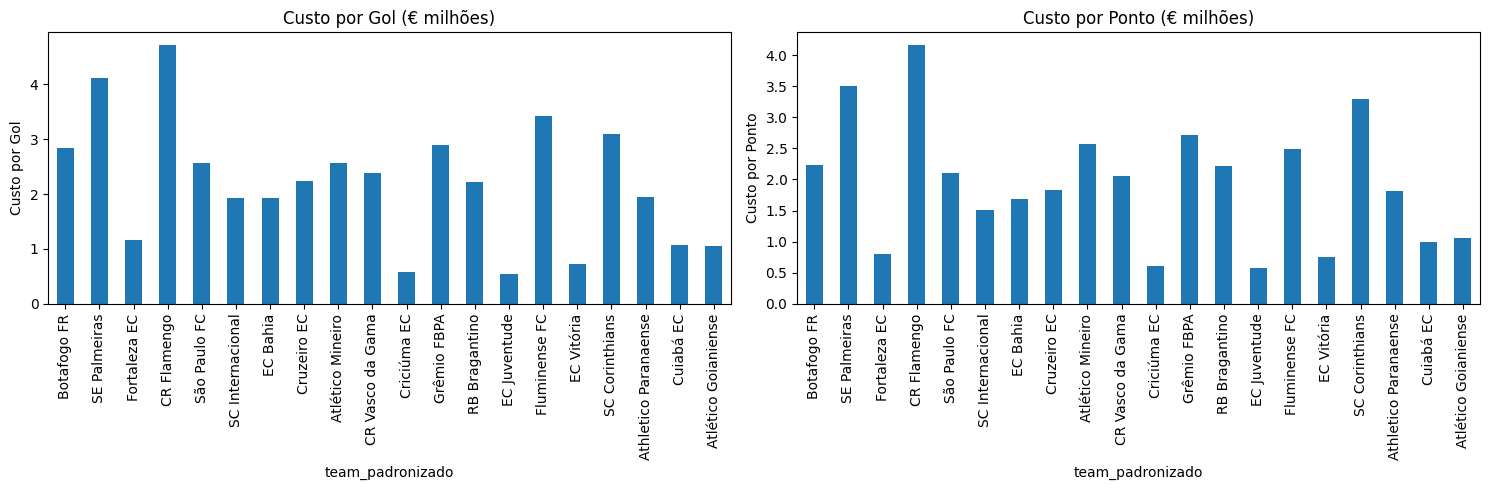

,team_padronizado,Custo por Gol (€),Custo por Ponto (€)
0,Botafogo FR,2.843750,2.237705
1,SE Palmeiras,4.114706,3.497500
2,Fortaleza EC,1.157692,0.806250
3,CR Flamengo,4.713333,4.158824
4,São Paulo FC,2.574390,2.111000
5,SC Internacional,1.936842,1.502041
6,EC Bahia,1.931250,1.679348
7,Cruzeiro EC,2.245833,1.837500
8,Atlético Mineiro,2.563415,2.563415
9,CR Vasco da Gama,2.380625,2.058919


In [39]:
# Gráficos para comparar os custos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de custo por gol
df.plot(kind='bar', x='team_padronizado', y='Custo por Gol (€)', ax=axes[0], legend=False)
axes[0].set_title('Custo por Gol (€ milhões)')
axes[0].set_ylabel('Custo por Gol')

# Gráfico de custo por ponto
df.plot(kind='bar', x='team_padronizado', y='Custo por Ponto (€)', ax=axes[1], legend=False)
axes[1].set_title('Custo por Ponto (€ milhões)')
axes[1].set_ylabel('Custo por Ponto')

plt.tight_layout()
plt.show()

# Exibir os dados calculados
df[['team_padronizado', 'Custo por Gol (€)', 'Custo por Ponto (€)']]



*  Custo por Gol mais baixo:
#####   EC Juventude (€0.54M) e Criciúma EC (€0.58M) são extremamente eficientes em marcar gols com menor custo.
    
*  Custo por Ponto mais baixo:
##### Fortaleza EC (€0.81M) tem o menor custo por ponto, destacando uma relação excelente entre investimento e pontuação.

*  Custo por Gol mais alto:
##### CR Flamengo (€4.71M) e SE Palmeiras (€4.11M) gastam mais para cada gol marcado, indicando uma ineficiência relativa.

*  Custo por Ponto mais alto:
##### CR Flamengo (€4.15M) e SE Palmeiras (€3.49M) também apresentam os maiores custos por ponto, sugerindo que o alto valor de mercado não está sendo traduzido em desempenho ideal no campo.



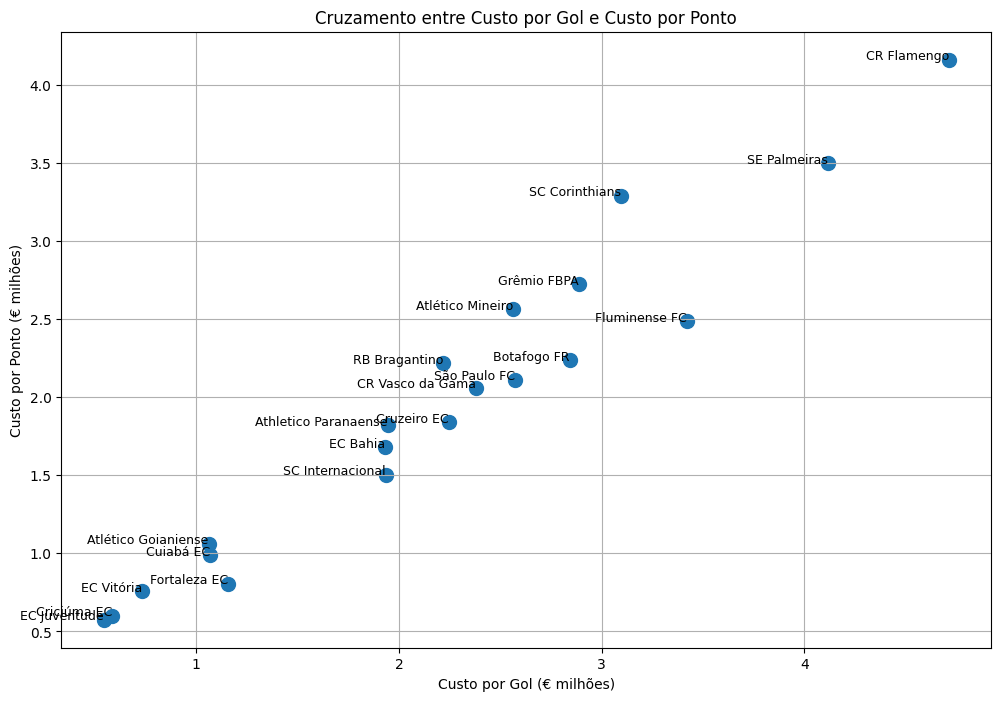

In [40]:
# Criar um gráfico de dispersão cruzando Custo por Gol e Custo por Ponto
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Custo por Gol (€)'], df['Custo por Ponto (€)'], s=100)

# Adicionar rótulos aos pontos
for i, team in enumerate(df['team_padronizado']):
    plt.text(df['Custo por Gol (€)'][i], df['Custo por Ponto (€)'][i], team, fontsize=9, ha='right')

# Adicionar título e rótulos
plt.title('Cruzamento entre Custo por Gol e Custo por Ponto')
plt.xlabel('Custo por Gol (€ milhões)')
plt.ylabel('Custo por Ponto (€ milhões)')

# Exibir o gráfico
plt.grid(True)
plt.show()



1.   Eficiência Máxima:
#### **Fortaleza EC**, **EC Juventude** e **Criciúma EC** mantêm a posição de maior eficiência, com baixo custo por ponto e por gol.
2.   Ineficiência Relativa:
#### **CR Flamengo** e **SE Palmeiras** continuam no topo da ineficiência, apresentando os maiores custos tanto por gol quanto por ponto.
3.   Clubes Intermediários:
#### **Atlético Mineiro**, **Grêmio** e **Fluminense** têm custos mais equilibrados, mas ainda estão distantes dos mais eficientes.
#### **Corinthians** apresenta um custo por ponto elevado, sugerindo uma dificuldade em transformar investimento em desempenho esportivo.
4.   Clubes com Bom Equilíbrio:
#### **Athletico Paranaense**, **SC Internacional** e **EC Bahia** se destacam por um custo relativamente baixo, indicando um bom aproveitamento financeiro.





In [53]:
team_season_std_stats = fbref.read_team_season_stats(stat_type="standard")
team_season_std_stats.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used   Age  Poss Playing Time  \
                                                                       MP   
league      season team                                                     
BRA-Serie A 2425   Ath Paranaense             30  27.2  50.0           28   
                   Atl Goianiense             40  27.3  46.8           30   
                   Atlético Mineiro           35  28.7  58.3           29   
                   Bahia                      27  28.7  55.8           30   
                   Botafogo (RJ)              37  28.8  52.7           30   

                                                     Performance          ...  \
                                    Starts   Min 90s         Gls Ast G+A  ...   
league      season team                                                   ...   
BRA-Serie A 2425   Ath Paranaense      308  2520  28          28  24  52  ...   
                   Atl Goianiense      330  2700  30          21  12  33  ...   
                   Atlético Mineiro    319  2610  29          41  21  62  ...   
                   Bahia               330  2700  30          40  33  73  ...   
                   Botafogo (RJ)       330  2700  30          48  32  80  ...   

                                    Per 90 Minutes                           \
                                               Ast   G+A  G-PK G+A-PK    xG   
league      season team                                                       
BRA-Serie A 2425   Ath Paranaense             0.86  1.86  0.96   1.82  1.29   
                   Atl Goianiense              0.4   1.1   0.6    1.0  1.07   
                   Atlético Mineiro           0.72  2.14   1.1   1.83  1.27   
                   Bahia                       1.1  2.43   1.3    2.4  1.31   
                   Botafogo (RJ)              1.07  2.67  1.47   2.53  1.45   

                                                                 \
                                      xAG xG+xAG  npxG npxG+xAG   
league      season team                                           
BRA-Serie A 2425   Ath Paranaense    1.03   2.32  1.26     2.29   
                   Atl Goianiense    0.75   1.82  0.97     1.72   
                   Atlético Mineiro  0.72   1.99   1.0     1.72   
                   Bahia             1.06   2.36  1.28     2.34   
                   Botafogo (RJ)     1.02   2.47   1.3     2.32   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats  

[5 rows x 32 columns]

In [88]:
# Selecionar colunas específicas do MultiIndex
xg_xag_df = team_season_std_stats[[('Performance','Gls'),
                                   ('Performance','Ast'),
                                   ('Expected','xG'),
                                   ('Expected','xAG')]]

# Renomear as colunas para facilitar o uso
xg_xag_df.columns = ['Gols','Assistencias','xG','xAG']
# Resetar o índice para mover liga e temporada para colunas separadas
xg_xag_df = xg_xag_df.reset_index(level=['league', 'season'], drop=True)
print(xg_xag_df)


                     Gols  Assistencias    xG   xAG
team                                               
Ath Paranaense         28            24  36.1  28.8
Atl Goianiense         21            12  32.2  22.4
Atlético Mineiro       41            21  36.8  21.0
Bahia                  40            33  39.2  31.7
Botafogo (RJ)          48            32  43.5  30.7
Corinthians            34            22  35.4  24.0
Criciúma               37            24  32.0  22.8
Cruzeiro               36            24  31.3  19.4
Cuiabá                 24            14  26.0  16.8
Flamengo               44            32  40.6  28.7
Fluminense             23            19  26.5  20.0
Fortaleza              37            29  34.7  25.6
Grêmio                 33            20  34.7  23.0
Internacional          37            23  45.5  30.9
Juventude              36            29  32.5  25.7
Palmeiras              49            32  53.3  38.8
Red Bull Bragantino    34            23  30.4  20.6
São Paulo   

                  Gols    xG  Gls_xG_diff  Assistencias   xAG  Ast_xAG_diff
team                                                                       
Ath Paranaense      28  36.1         -8.1            24  28.8          -4.8
Atl Goianiense      21  32.2        -11.2            12  22.4         -10.4
Atlético Mineiro    41  36.8          4.2            21  21.0           0.0
Bahia               40  39.2          0.8            33  31.7           1.3
Botafogo (RJ)       48  43.5          4.5            32  30.7           1.3


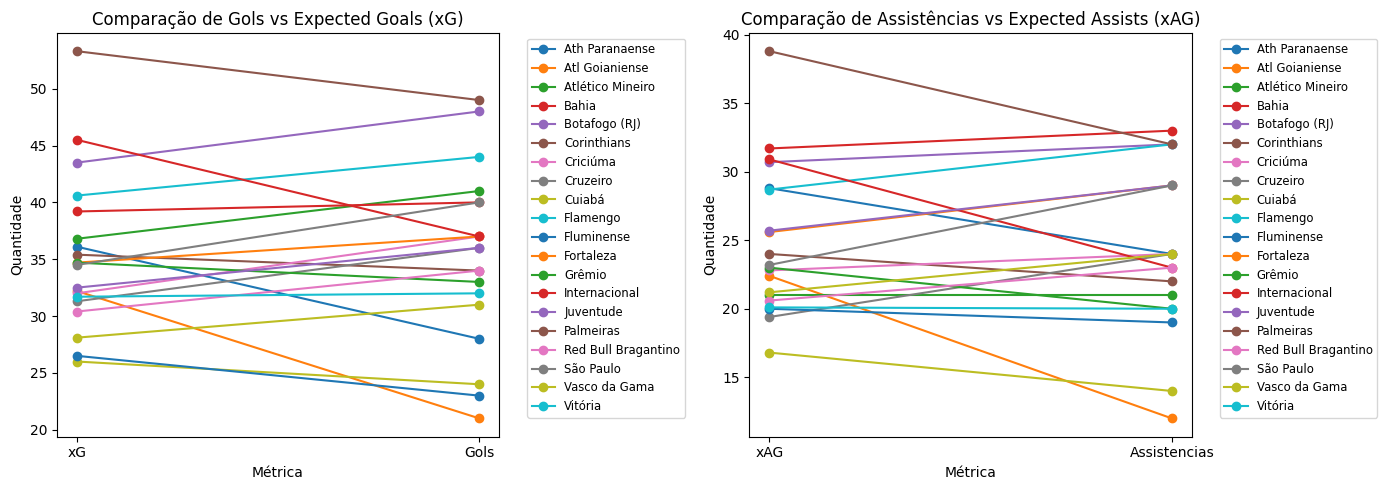

In [90]:
# Calcular as diferenças entre valores reais e esperados
xg_xag_df['Gls_xG_diff'] = xg_xag_df['Gols'] - xg_xag_df['xG']
xg_xag_df['Ast_xAG_diff'] = xg_xag_df['Assistencias'] - xg_xag_df['xAG']

# Exibir uma amostra do DataFrame para conferência
print(xg_xag_df[['Gols', 'xG', 'Gls_xG_diff', 'Assistencias', 'xAG', 'Ast_xAG_diff']].head())

# Criar gráficos para comparação
plt.figure(figsize=(14, 5))

# Subplot 1: Gols vs xG
plt.subplot(1, 2, 1)
for i, row in xg_xag_df.iterrows():
    plt.plot(['xG', 'Gols'], [row['xG'], row['Gols']], marker='o', label=f'{i}')

plt.title('Comparação de Gols vs Expected Goals (xG)')
plt.xlabel('Métrica')
plt.ylabel('Quantidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adicionar legenda externa

# Subplot 2: Assistências vs xAG
plt.subplot(1, 2, 2)
for i, row in xg_xag_df.iterrows():
    plt.plot(['xAG', 'Assistencias'], [row['xAG'], row['Assistencias']], marker='o', label=f'{i}')

plt.title('Comparação de Assistências vs Expected Assists (xAG)')
plt.xlabel('Métrica')
plt.ylabel('Quantidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adicionar legenda externa

plt.tight_layout()
plt.show()

#Interpretação dos Resultados
- Gols e Assistências Acima das Expectativas: Se a diferença for positiva, o time está superando as expectativas.

- Gols e Assistências Abaixo das Expectativas: Se a diferença for negativa, o desempenho está abaixo do esperado.

#Eficiência Ofensiva (Overperformance / Underperformance)

In [92]:
# Calcular eficiência ofensiva: Gols / xG
xg_xag_df['Eficiencia_Ofensiva'] = xg_xag_df['Gols'] / xg_xag_df['xG']

# Exibir a eficiência ofensiva
print(xg_xag_df[['Gols', 'xG', 'Eficiencia_Ofensiva']])


                     Gols    xG  Eficiencia_Ofensiva
team                                                
Ath Paranaense         28  36.1             0.775623
Atl Goianiense         21  32.2             0.652174
Atlético Mineiro       41  36.8              1.11413
Bahia                  40  39.2             1.020408
Botafogo (RJ)          48  43.5             1.103448
Corinthians            34  35.4             0.960452
Criciúma               37  32.0              1.15625
Cruzeiro               36  31.3              1.15016
Cuiabá                 24  26.0             0.923077
Flamengo               44  40.6             1.083744
Fluminense             23  26.5             0.867925
Fortaleza              37  34.7             1.066282
Grêmio                 33  34.7             0.951009
Internacional          37  45.5             0.813187
Juventude              36  32.5             1.107692
Palmeiras              49  53.3             0.919325
Red Bull Bragantino    34  30.4             1.

In [93]:
# Calcular eficiência de assistências: Assistências / xAG
xg_xag_df['Eficiencia_Assistencias'] = xg_xag_df['Assistencias'] / xg_xag_df['xAG']

# Exibir a eficiência de assistências
print(xg_xag_df[['Assistencias', 'xAG', 'Eficiencia_Assistencias']])

                     Assistencias   xAG  Eficiencia_Assistencias
team                                                            
Ath Paranaense                 24  28.8                 0.833333
Atl Goianiense                 12  22.4                 0.535714
Atlético Mineiro               21  21.0                      1.0
Bahia                          33  31.7                 1.041009
Botafogo (RJ)                  32  30.7                 1.042345
Corinthians                    22  24.0                 0.916667
Criciúma                       24  22.8                 1.052632
Cruzeiro                       24  19.4                 1.237113
Cuiabá                         14  16.8                 0.833333
Flamengo                       32  28.7                 1.114983
Fluminense                     19  20.0                     0.95
Fortaleza                      29  25.6                 1.132812
Grêmio                         20  23.0                 0.869565
Internacional            

###### Interpretação:
###### Valor > 1: Overperformance (gols além do esperado).
###### Valor < 1: Underperformance (gols abaixo do esperado).

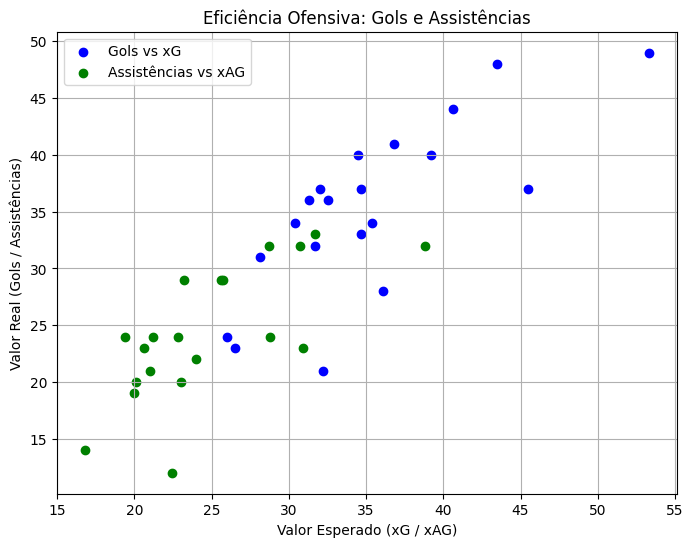

In [94]:
plt.figure(figsize=(8, 6))

# Scatter plot para eficiência ofensiva
plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'], color='blue', label='Gols vs xG')
plt.scatter(xg_xag_df['xAG'], xg_xag_df['Assistencias'], color='green', label='Assistências vs xAG')

plt.xlabel('Valor Esperado (xG / xAG)')
plt.ylabel('Valor Real (Gols / Assistências)')
plt.title('Eficiência Ofensiva: Gols e Assistências')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
# Diferença percentual para Gols
xg_xag_df['Diff_Percent_Gols'] = ((xg_xag_df['Gols'] - xg_xag_df['xG']) / xg_xag_df['xG']) * 100

# Diferença percentual para Assistências
xg_xag_df['Diff_Percent_Assist'] = ((xg_xag_df['Assistencias'] - xg_xag_df['xAG']) / xg_xag_df['xAG']) * 100

# Exibir as diferenças percentuais
print(xg_xag_df[['Diff_Percent_Gols', 'Diff_Percent_Assist']])


                     Diff_Percent_Gols  Diff_Percent_Assist
team                                                       
Ath Paranaense              -22.437673           -16.666667
Atl Goianiense              -34.782609           -46.428571
Atlético Mineiro             11.413043                  0.0
Bahia                         2.040816             4.100946
Botafogo (RJ)                10.344828             4.234528
Corinthians                  -3.954802            -8.333333
Criciúma                        15.625             5.263158
Cruzeiro                     15.015974             23.71134
Cuiabá                       -7.692308           -16.666667
Flamengo                      8.374384            11.498258
Fluminense                  -13.207547                 -5.0
Fortaleza                     6.628242             13.28125
Grêmio                       -4.899135           -13.043478
Internacional               -18.681319           -25.566343
Juventude                    10.769231  

Interpretação:
- Valores positivos indicam overperformance.
- Valores negativos indicam underperformance.

In [98]:
# Ranking por eficiência ofensiva
ranking_ofensivo = xg_xag_df.sort_values('Eficiencia_Ofensiva', ascending=False)
print("Ranking por Eficiência Ofensiva:")
print(ranking_ofensivo[['Eficiencia_Ofensiva']])

# Ranking por eficiência de assistências
ranking_assistencias = xg_xag_df.sort_values('Eficiencia_Assistencias', ascending=False)
print("\nRanking por Eficiência de Assistências:")
print(ranking_assistencias[['Eficiencia_Assistencias']])


correlacao_gols = xg_xag_df[['Gols', 'xG']].corr().iloc[0, 1]
correlacao_assist = xg_xag_df[['Assistencias', 'xAG']].corr().iloc[0, 1]

print(f"Correlação entre Gols e xG: {correlacao_gols:.2f}")
print(f"Correlação entre Assistências e xAG: {correlacao_assist:.2f}")


Ranking por Eficiência Ofensiva:
                     Eficiencia_Ofensiva
team                                    
São Paulo                        1.15942
Criciúma                         1.15625
Cruzeiro                         1.15016
Red Bull Bragantino             1.118421
Atlético Mineiro                 1.11413
Juventude                       1.107692
Botafogo (RJ)                   1.103448
Vasco da Gama                   1.103203
Flamengo                        1.083744
Fortaleza                       1.066282
Bahia                           1.020408
Vitória                         1.009464
Corinthians                     0.960452
Grêmio                          0.951009
Cuiabá                          0.923077
Palmeiras                       0.919325
Fluminense                      0.867925
Internacional                   0.813187
Ath Paranaense                  0.775623
Atl Goianiense                  0.652174

Ranking por Eficiência de Assistências:
                     Efi

# Correlação entre Gols e xG: 0.76

- Isso indica uma forte correlação positiva, ou seja, os valores de xG conseguem explicar razoavelmente bem o número de gols marcados pelos times.
- No entanto, o valor não é perfeito (1.0), sugerindo que alguns times estão superando ou ficando abaixo do esperado. Isso pode indicar:
  - Eficiência nas finalizações: Times que convertem mais do que o esperado.
  - Desempenho inferior: Times que desperdiçam chances claras de gol.

# Correlação entre Assistências e xAG: 0.70

- Também é uma correlação positiva forte, mas ligeiramente menor do que a de gols e xG. Isso pode indicar:
  - A criação de chances é relativamente consistente com o número de assistências, mas existem variações.
  - Jogadas individuais ou outros fatores podem estar resultando em gols sem assistência direta.

In [101]:
# Identificar outliers em Gols vs xG
outliers_gols = xg_xag_df[xg_xag_df['Gls_xG_diff'].abs() > 5]
print("Times com desempenho fora da curva em Gols:")
print(outliers_gols[['Gols', 'xG', 'Gls_xG_diff']])

# Identificar outliers em Assistências vs xAG
outliers_assists = xg_xag_df[xg_xag_df['Ast_xAG_diff'].abs() > 5]
print("\nTimes com desempenho fora da curva em Assistências:")
print(outliers_assists[['Assistencias', 'xAG', 'Ast_xAG_diff']])

Times com desempenho fora da curva em Gols:
                Gols    xG  Gls_xG_diff
team                                   
Ath Paranaense    28  36.1         -8.1
Atl Goianiense    21  32.2        -11.2
Internacional     37  45.5         -8.5
São Paulo         40  34.5          5.5

Times com desempenho fora da curva em Assistências:
                Assistencias   xAG  Ast_xAG_diff
team                                            
Atl Goianiense            12  22.4         -10.4
Internacional             23  30.9          -7.9
Palmeiras                 32  38.8          -6.8
São Paulo                 29  23.2           5.8


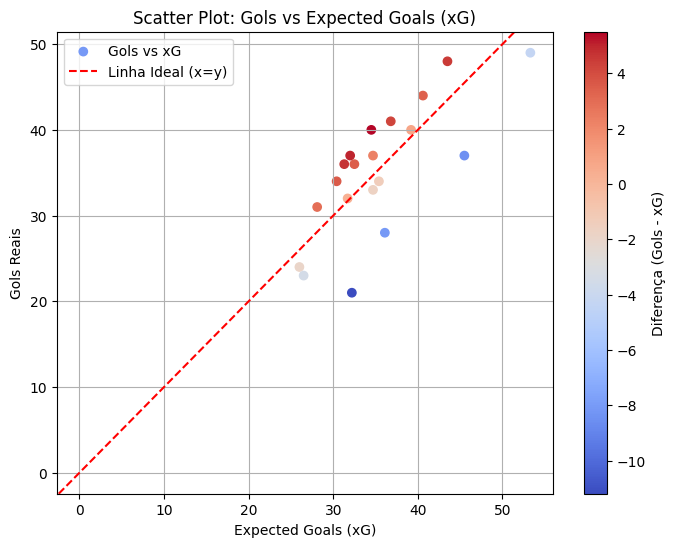

In [113]:
# Calcular a diferença entre Gols e xG
xg_xag_df['Gls_xG_diff'] = xg_xag_df['Gols'] - xg_xag_df['xG']

# Scatter plot com coloração baseada na diferença
plt.figure(figsize=(8, 6))
scatter = plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'],
                      c=xg_xag_df['Gls_xG_diff'], cmap='coolwarm', label='Gols vs xG')

# Adicionar linha ideal
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Linha Ideal (x=y)')

plt.xlabel('Expected Goals (xG)')
plt.ylabel('Gols Reais')
plt.title('Scatter Plot: Gols vs Expected Goals (xG)')

# Adicionar barra de cores
plt.colorbar(scatter, label='Diferença (Gols - xG)')
plt.legend()
plt.grid(True)
plt.show()


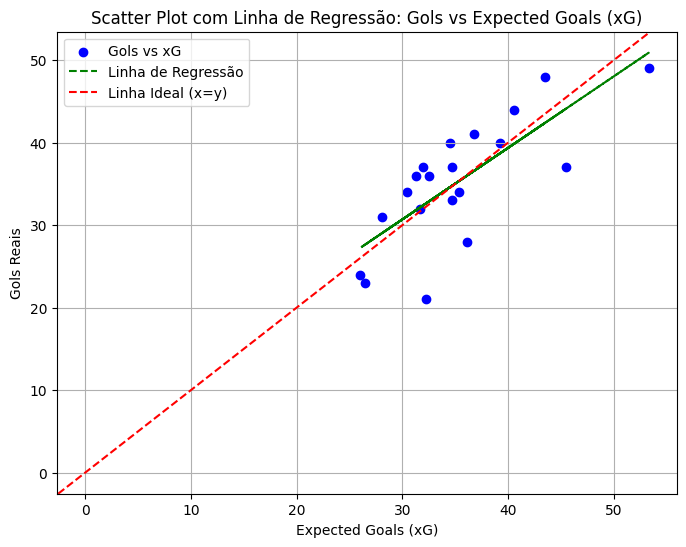

In [109]:
# Ajustar uma linha de regressão linear
m, b = np.polyfit(xg_xag_df['xG'], xg_xag_df['Gols'], 1)

# Plotar scatter e linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'], color='blue', label='Gols vs xG')
plt.plot(xg_xag_df['xG'], m * xg_xag_df['xG'] + b, color='green', linestyle='--', label='Linha de Regressão')

# Adicionar linha ideal
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Linha Ideal (x=y)')

plt.xlabel('Expected Goals (xG)')
plt.ylabel('Gols Reais')
plt.title('Scatter Plot com Linha de Regressão: Gols vs Expected Goals (xG)')
plt.legend()
plt.grid(True)
plt.show()


- A linha de regressão verde mostra uma forte relação linear entre o xG e os Gols Reais, o que está de acordo com a correlação de 0.76.

- No entanto, a linha de regressão não é perfeitamente sobreposta à linha ideal, indicando que alguns times podem estar marcando mais ou menos do que o esperado, revelando overperformances e underperformances.